In [3]:
import adi
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import sdr_utils as sutil
import seaborn as sns
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objects as go
from numpy.fft import fft, ifft

In [30]:
sdr = adi.ad9361(uri='ip:192.168.2.1')
samp_rate = 30.72e6    # must be <=30.72 MHz if both channels are enabled
num_samps_tx = 128e2
num_samps_rx = 128e5
#num_samps = 2**18      # number of samples per buffer.  Can be different for Rx and Tx
rx_lo = 2.0e9
rx_mode = "manual"  # can be "manual" or "slow_attack"
rx_gain0 = 0
rx_gain1 = 0
tx_lo = rx_lo
tx_gain0 = -50
tx_gain1 = -50

'''Configure Rx properties'''
sdr.rx_enabled_channels = [0, 1]
sdr.sample_rate = int(samp_rate)
sdr.rx_lo = int(rx_lo)
sdr.gain_control_mode = rx_mode
sdr.rx_hardwaregain_chan0 = int(rx_gain0)
sdr.rx_hardwaregain_chan1 = int(rx_gain1)
sdr.rx_buffer_size = int(num_samps_rx)

'''Configure Tx properties'''
sdr.tx_rf_bandwidth = int(samp_rate)
sdr.tx_lo = int(tx_lo)
sdr.tx_cyclic_buffer = True
sdr.tx_hardwaregain_chan0 = int(tx_gain0)
sdr.tx_hardwaregain_chan1 = int(tx_gain1)
sdr.tx_buffer_size = int(num_samps_tx)

In [31]:
## quick continuous doppler radar

f0 = 6e3
Ts = 1/sdr.sample_rate
t = np.linspace(0, Ts*num_samps_tx, int(num_samps_tx))
IQ_send = np.sin(f0*t) + 1j*np.zeros(int(num_samps_tx))
TX2_zeros = np.zeros(len(IQ_send))


In [32]:
# Start the transmitter
#sdr.tx_cyclic_buffer = False # Enable cyclic buffers
sdr.tx_cyclic_buffer = True # Enable cyclic buffers
sdr.tx([IQ_send, TX2_zeros]) # start transmitting

#sdr.rx_annotated = False
for i in range(0,10):
    sdr.rx()

data_rx_0 = []
data_rx_1 = []
# Clear buffer just to be safe
# for i in range (0, 10):
#     sample_rx = sdr.rx()
#     data_rx_0 = np.concatenate([data_rx_0, sample_rx[0]])
#     data_rx_1 = np.concatenate([data_rx_1, sample_rx[1]])

sample_rx = sdr.rx()
data_rx_0 = sample_rx[0]
data_rx_1 = sample_rx[1]
    
    
sdr.tx_destroy_buffer()

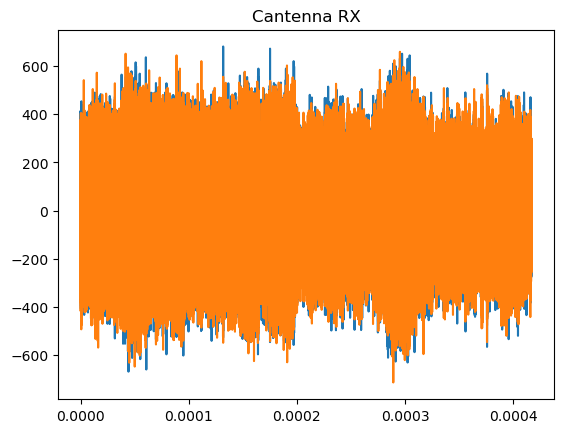

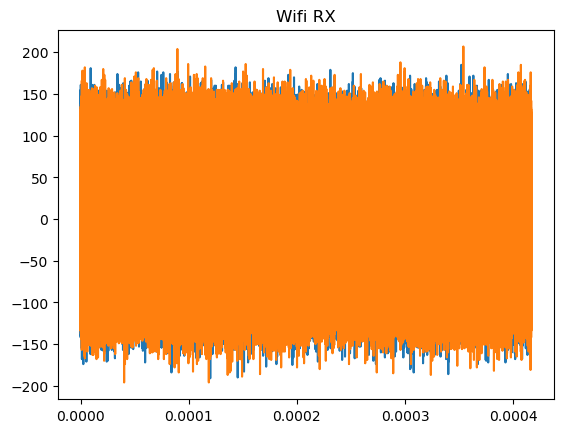

In [33]:
t = np.linspace(0, Ts*num_samps_tx, int(num_samps_rx))

plt.plot(t, data_rx_0.real)
plt.plot(t, data_rx_0.imag)
plt.title("Cantenna RX")
plt.show()


plt.plot(t, data_rx_1.real)
plt.plot(t, data_rx_1.imag)
plt.title("Wifi RX")
plt.show()


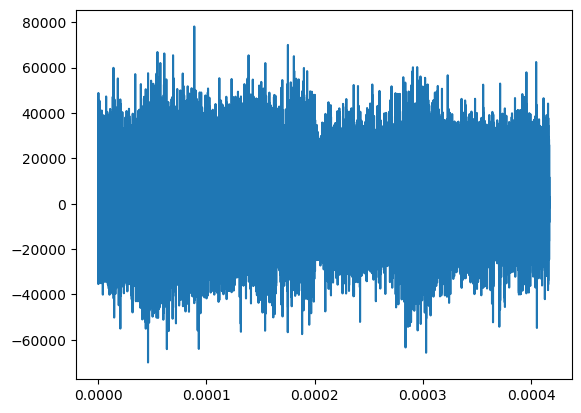

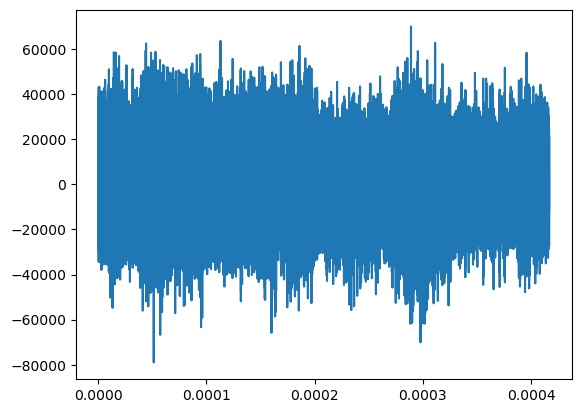

In [34]:
mixed = data_rx_0 * np.conjugate(data_rx_1)

plt.plot(t, mixed.real)
plt.show()

plt.plot(t, mixed.imag)
plt.show()